In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import f

In [2]:
hosts = ['Barking and Dagenham', 'Greenwich', 'Hackney', 'Newham', 'Tower Hamlets', 'Waltham Forest']

In [3]:
housing = pd.read_csv('housing-sales-borough.csv')
housing = housing.drop(columns=['Code'])
housing = housing.T
housing['Total'] = housing.sum(axis=1)
housing['Total']['Area'] = 'All Boroughs'
housing = housing.rename(columns=housing.iloc[0])
housing = housing.drop(['Area'])
housing['All Boroughs'] = housing['All Boroughs'].astype(int)
housing.head()

,City of London,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,East Midlands,West Midlands,East,London,South East,South West,England,Wales,England & Wales,All Boroughs
Sales-1995,155,660,4047,2415,2632,3976,2542,3456,3377,3541,...,64029,71118,92578,84539,141466,82253,732008,33321,765329,2431744
Sales-1996,275,883,5367,2934,3035,5408,3403,4692,4411,4304,...,76173,84421,113946,108758,176362,105672,888864,40781,929645,2965670
Sales-1997,319,1451,6282,3734,3731,6306,3891,5716,5323,5156,...,85699,93173,130498,133620,201018,121982,1013798,46864,1060662,3402362
Sales-1998,428,1921,6073,3618,4067,5645,3551,6180,5229,5397,...,84156,89800,124038,133802,187416,116864,982246,44182,1026428,3302706
Sales-1999,536,2261,7420,4561,4553,6900,4026,7241,6170,6056,...,96184,102266,144099,162956,214965,135249,1127379,48503,1175882,3805055


In [4]:
nonHosts = []
for bor in housing.columns:
    if bor not in hosts:
        nonHosts.append(bor)

In [6]:
c_zone = ['City of London','Camden','Islington','Kensington and Chelsea','Lambeth','Southwark','Westminster']
e_zone = ['Barking and Dagenham','Bexley','Greenwich','Hackney','Havering','Lewisham','Newham','Redbridge','Tower Hamlets','Waltham Forest']
n_zone = ['Barnet','Enfield','Haringey']
s_zone = ['Bromley','Croydon','Merton','Sutton','Wandsworth','Kingston upon Thames']
w_zone = ['Brent','Ealing','Hammersmith and Fulham','Harrow','Richmond upon Thames','Hillingdon','Hounslow']

In [7]:
housing_percent = pd.read_csv('housing-sales-borough.csv')
housing_percent = housing_percent.drop(columns=['Code'])
housing_percent['Zone'] = ['West' if x in w_zone else ('North' if x in n_zone else ('East' if x in e_zone else ('South' if x in s_zone else 'Center'))) for x in housing_percent['Area']] 
housing_percent = housing_percent.drop(columns=['Area'])
housing_percent = housing_percent.groupby(['Zone']).agg(sum)
for year in range(1996,2015):
    housing_percent[str(year)+'-Percent'] = housing_percent.apply(lambda row: (row['Sales-'+str(year)] - row['Sales-'+str(year-1)]) / row['Sales-'+str(year-1)], axis=1)
for year in range(1995,2015):
    housing_percent = housing_percent.drop(columns=['Sales-'+str(year)])
for year in range(1996,2009):
    housing_percent = housing_percent.drop(columns=[str(year)+'-Percent'])
housing_percent = housing_percent.T
housing_percent

Zone,Center,East,North,South,West
2009-Percent,-0.038832,-0.147714,-0.117318,0.012094,-0.103107
2010-Percent,0.070519,0.184983,0.236623,0.129185,0.286382
2011-Percent,-0.004166,-0.020672,-0.053632,-0.008583,-0.014438
2012-Percent,0.000083,0.058738,0.029916,0.036842,0.000695
2013-Percent,0.207351,0.242287,0.179437,0.208786,0.152321
2014-Percent,0.132389,0.143904,0.044517,0.051845,0.000185


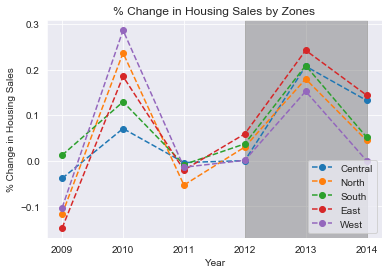

In [8]:
sns.set_style('darkgrid') 
plt.plot(range(2009,2015), housing_percent['Center'],'--o')
plt.plot(range(2009,2015), housing_percent['North'],'--o')
plt.plot(range(2009,2015), housing_percent['South'],'--o')
plt.plot(range(2009,2015), housing_percent['East'],'--o')
plt.plot(range(2009,2015), housing_percent['West'],'--o')
plt.legend(['Central','North','South','East','West'],loc=4) # loc just specifies the location of legend (1,2,3,4 are similar to quadrant position)
ax = plt.gca()
ax.axvspan(2012, 2014, alpha=0.5, color='grey')
ax.set_xlabel('Year')
ax.set_ylabel('% Change in Housing Sales')
ax.set_title('% Change in Housing Sales by Zones')
plt.savefig('Housing Sales.png', dpi=300)

In [60]:
housing_zone = pd.read_csv('housing-sales-borough.csv')
housing_zone = housing_zone.drop(columns=['Code'])
housing_zone['Zone'] = ['West' if x in w_zone else ('North' if x in n_zone else ('East' if x in e_zone else ('South' if x in s_zone else 'Center'))) for x in housing_zone['Area']] 
housing_zone = housing_zone.drop(columns=['Area'])
housing_zone = housing_zone.groupby(['Zone']).agg(sum)
housing_zone_test = housing_zone
housing_zone = housing_zone.T
housing_zone['Year'] = [y for y in range(1995, 2015)]
housing_zone_test = housing_zone
housing_zone_test['East-North'] = housing_zone_test.apply(lambda row: (row['East'] - row['North']), axis=1)
housing_zone_test['East-West'] = housing_zone_test.apply(lambda row: (row['East'] - row['West']), axis=1)
housing_zone_test['East-South'] = housing_zone_test.apply(lambda row: (row['East'] - row['South']), axis=1)
housing_zone_test['East-Center'] = housing_zone_test.apply(lambda row: (row['East'] - row['Center']), axis=1)
housing_zone_test

Zone,Center,East,North,South,West,Year,East-North,East-West,East-South,East-Center
Sales-1995,2362977,18269,10102,20136,20260,1995,8167,-1991,-1867,-2344708
Sales-1996,2877639,22802,12724,26316,26189,1996,10078,-3387,-3514,-2854837
Sales-1997,3295317,30366,15258,31284,30137,1997,15108,229,-918,-3264951
Sales-1998,3194540,33400,15213,30644,28909,1998,18187,4491,2756,-3161140
Sales-1999,3672792,41817,17971,37343,35132,1999,23846,6685,4474,-3630975
Sales-2000,3461808,41355,16117,31938,30257,2000,25238,11098,9417,-3420453
Sales-2001,3819312,47615,18326,35993,32607,2001,29289,15008,11622,-3771697
Sales-2002,4143859,50920,19129,39361,35429,2002,31791,15491,11559,-4092939
Sales-2003,3790864,45880,16131,33222,31721,2003,29749,14159,12658,-3744984
Sales-2004,3819595,48117,16885,35859,32094,2004,31232,16023,12258,-3771478


**East - North**

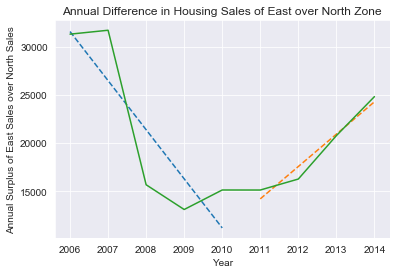

3.1533207264376553


2.83953582922801

In [95]:
breakpoint = 5
X = np.array([[[i, 0, 0] for i in range(2006, 2011)] + [[i, 1, i] for i in range(2011, 2015)]]).reshape(9, 3) #dummy variable
y = housing_zone_test['East-North'].iloc[11:]
reg = LinearRegression().fit(X, y)
reg.score(X, y)
X_n = np.array(list(range(2006, 2015))).reshape(-1, 1)
X_1 = np.array([[i, 0, 0] for i in range(2006, 2011)])
X_2 = np.array([[i, 1, i] for i in range(2011, 2015)])
reg.predict(X_1)
plt.plot(X_n[:breakpoint,0], reg.predict(X_1), "--")
plt.plot(X_n[breakpoint:,0], reg.predict(X_2), "--")
plt.plot(X_n, y)
plt.xlabel('Year'); plt.ylabel('Annual Surplus of East Sales over North Sales');
plt.title('Annual Difference in Housing Sales of East over North Zone')
plt.savefig('East-North-HousingSales.png', dpi=300)
plt.show()
def rss(y, y_pred):
    return mean_squared_error(y, y_pred)
def chow(y, y_pred_all, y_pred_1, y_pred_2, N, k, breakpoint = 5):
    rss_p = rss(y, y_pred_all)
    rss_1 = rss(y[:breakpoint], reg.predict(X_1))
    rss_2 = rss(y[breakpoint:], reg.predict(X_2))
    num = (rss_p - rss_1 - rss_2)/(k)
    den = (rss_1 + rss_2)/(N-2*k)
    return num/den
reg_all = LinearRegression().fit(X_n, y)
y_pred_all = reg_all.predict(X_n)
y_pred_1 = reg.predict(X_1)
y_pred_2 =  reg.predict(X_2)
print(chow(y, y_pred_all, y_pred_1, y_pred_2, 9, 2))
f.ppf(0.85,2,5)

**East - West**

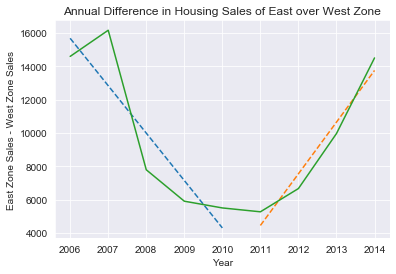

6.206479191356009


5.786135043349964

In [93]:
breakpoint = 5
X = np.array([[[i, 0, 0] for i in range(2006, 2011)] + [[i, 1, i] for i in range(2011, 2015)]]).reshape(9, 3) #dummy variable
y = housing_zone_test['East-West'].iloc[11:]
reg = LinearRegression().fit(X, y)
reg.score(X, y)
X_n = np.array(list(range(2006, 2015))).reshape(-1, 1)
X_1 = np.array([[i, 0, 0] for i in range(2006, 2011)])
X_2 = np.array([[i, 1, i] for i in range(2011, 2015)])
reg.predict(X_1)
plt.plot(X_n[:breakpoint,0], reg.predict(X_1), "--")
plt.plot(X_n[breakpoint:,0], reg.predict(X_2), "--")
plt.plot(X_n, y)
plt.xlabel('Year'); plt.ylabel('East Zone Sales - West Zone Sales');
plt.title('Annual Difference in Housing Sales of East over West Zone')
plt.savefig('East-West-HousingSales.png', dpi=300)
plt.show()
def rss(y, y_pred):
    return mean_squared_error(y, y_pred)
def chow(y, y_pred_all, y_pred_1, y_pred_2, N, k, breakpoint = 5):
    rss_p = rss(y, y_pred_all)
    rss_1 = rss(y[:breakpoint], reg.predict(X_1))
    rss_2 = rss(y[breakpoint:], reg.predict(X_2))
    num = (rss_p - rss_1 - rss_2)/(k)
    den = (rss_1 + rss_2)/(N-2*k)
    return num/den
reg_all = LinearRegression().fit(X_n, y)
y_pred_all = reg_all.predict(X_n)
y_pred_1 = reg.predict(X_1)
y_pred_2 =  reg.predict(X_2)
print(chow(y, y_pred_all, y_pred_1, y_pred_2, 9, 2))
f.ppf(0.95,2,5)

**East - Center**

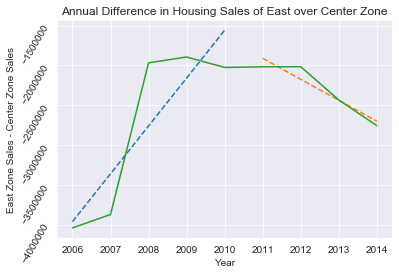

2.2511745948026207


2.21236003629284

In [115]:
breakpoint = 5
X = np.array([[[i, 0, 0] for i in range(2006, 2011)] + [[i, 1, i] for i in range(2011, 2015)]]).reshape(9, 3) #dummy variable
y = housing_zone_test['East-Center'].iloc[11:]
reg = LinearRegression().fit(X, y)
reg.score(X, y)
X_n = np.array(list(range(2006, 2015))).reshape(-1, 1)
X_1 = np.array([[i, 0, 0] for i in range(2006, 2011)])
X_2 = np.array([[i, 1, i] for i in range(2011, 2015)])
reg.predict(X_1)
plt.plot(X_n[:breakpoint,0], reg.predict(X_1), "--")
plt.plot(X_n[breakpoint:,0], reg.predict(X_2), "--")
plt.plot(X_n, y)
plt.yticks(rotation=60)
plt.xlabel('Year'); plt.ylabel('East Zone Sales - Center Zone Sales');
plt.title('Annual Difference in Housing Sales of East over Center Zone')
plt.savefig('East-Center-HousingSales.png', dpi=300)
plt.show()
def rss(y, y_pred):
    return mean_squared_error(y, y_pred)
def chow(y, y_pred_all, y_pred_1, y_pred_2, N, k, breakpoint = 5):
    rss_p = rss(y, y_pred_all)
    rss_1 = rss(y[:breakpoint], reg.predict(X_1))
    rss_2 = rss(y[breakpoint:], reg.predict(X_2))
    num = (rss_p - rss_1 - rss_2)/(k)
    den = (rss_1 + rss_2)/(N-2*k)
    return num/den
reg_all = LinearRegression().fit(X_n, y)
y_pred_all = reg_all.predict(X_n)
y_pred_1 = reg.predict(X_1)
y_pred_2 =  reg.predict(X_2)
print(chow(y, y_pred_all, y_pred_1, y_pred_2, 9, 2))
f.ppf(0.795,2,5)

**East - South**

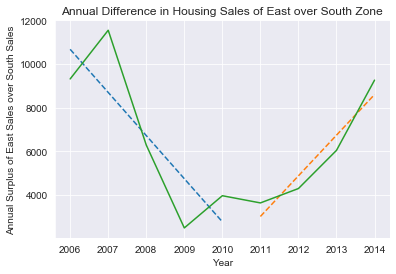

2.7048642823958176


2.2591348467896957

In [91]:
breakpoint = 5
X = np.array([[[i, 0, 0] for i in range(2006, 2011)] + [[i, 1, i] for i in range(2011, 2015)]]).reshape(9, 3) #dummy variable
y = housing_zone_test['East-South'].iloc[11:]
reg = LinearRegression().fit(X, y)
reg.score(X, y)
X_n = np.array(list(range(2006, 2015))).reshape(-1, 1)
X_1 = np.array([[i, 0, 0] for i in range(2006, 2011)])
X_2 = np.array([[i, 1, i] for i in range(2011, 2015)])
reg.predict(X_1)
plt.plot(X_n[:breakpoint,0], reg.predict(X_1), "--")
plt.plot(X_n[breakpoint:,0], reg.predict(X_2), "--")
plt.plot(X_n, y)
plt.xlabel('Year'); plt.ylabel('Annual Surplus of East Sales over South Sales');
plt.title('Annual Difference in Housing Sales of East over South Zone')
plt.savefig('East-South-HousingSales.png', dpi=300)
plt.show()
def rss(y, y_pred):
    return mean_squared_error(y, y_pred)
def chow(y, y_pred_all, y_pred_1, y_pred_2, N, k, breakpoint = 5):
    rss_p = rss(y, y_pred_all)
    rss_1 = rss(y[:breakpoint], reg.predict(X_1))
    rss_2 = rss(y[breakpoint:], reg.predict(X_2))
    num = (rss_p - rss_1 - rss_2)/(k)
    den = (rss_1 + rss_2)/(N-2*k)
    return num/den
reg_all = LinearRegression().fit(X_n, y)
y_pred_all = reg_all.predict(X_n)
y_pred_1 = reg.predict(X_1)
y_pred_2 =  reg.predict(X_2)
print(chow(y, y_pred_all, y_pred_1, y_pred_2, 9, 2))
f.ppf(0.80,2,5)